In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('hotels_train.csv')

df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [89]:
!pip install geonamescache
!pip install pycountry

In [90]:
import geonamescache
import pycountry

In [91]:
countries = {country.name: country.alpha_2 for country in pycountry.countries}

gc = geonamescache.GeonamesCache()
cities = {data['name']: city for city, data in gc.get_cities().items()}

In [92]:
def extract_city_country(address):
    adress_lower = address.lower()
    country_found = next((name for name in countries if name.lower() in adress_lower), 'Unknown')
    city_found = next((name for name in cities if name.lower() in adress_lower), 'Unknown')
    return pd.Series([city_found, country_found])

In [93]:
df[['city', 'country']] = df['hotel_address'].apply(extract_city_country)

In [94]:
print(df[['city', 'country']].drop_duplicates().head(10))

          city         country
0       London  United Kingdom
2       Rennes          France
3        Paris          France
4          Mol     Netherlands
5         Mila           Italy
6   Kensington  United Kingdom
7       Vienna         Austria
14   Barcelona           Spain
15        Aspe           Spain
19       Pinto           Spain


In [95]:
empty = df.isnull().sum()
print(empty[empty > 0])

lat    2448
lng    2448
dtype: int64


In [96]:
df['lat'] = df.groupby('city')['lat'].transform(lambda x: x.fillna(x.median()))
df['lng'] = df.groupby('city')['lng'].transform(lambda x: x.fillna(x.median()))

df['lat'] = df.groupby('country')['lat'].transform(lambda x: x.fillna(x.median()))
df['lng'] = df.groupby('country')['lng'].transform(lambda x: x.fillna(x.median()))

print(df[['lat', 'lng']].isnull().sum())


lat    0
lng    0
dtype: int64


In [97]:
!pip install --no-cache-dir vaderSentiment==3.3.2

In [98]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [100]:
sent_analyzer = SentimentIntensityAnalyzer()
df['rw_neg'] = df['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x))
df['rw_pos'] = df['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x))

df.loc[:,['n_neg', 'n_neu', 'n_pos', 'n_compound']] = list(df['rw_neg'].apply(lambda x: [x['neg'], x['neu'], x['pos'], x['compound']]).values)
df.loc[:,['p_neg', 'p_neu', 'p_pos', 'p_compound']] = list(df['rw_pos'].apply(lambda x: [x['neg'], x['neu'], x['pos'], x['compound']]).values)

In [101]:
df.drop(columns=['rw_pos'], inplace = True)
df.drop(columns=['rw_neg'], inplace = True)

In [102]:
df['review_date'] = pd.to_datetime(df['review_date'])


df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month
df['review_day_of_week'] = df['review_date'].dt.dayofweek


print(df[['review_date', 'review_year', 'review_month', 'review_day_of_week']].head(10))

  review_date  review_year  review_month  review_day_of_week
0  2016-02-19         2016             2                   4
1  2017-01-12         2017             1                   3
2  2016-10-18         2016            10                   1
3  2015-09-22         2015             9                   1
4  2016-03-05         2016             3                   5
5  2015-12-30         2015            12                   2
6  2017-05-18         2017             5                   3
7  2017-01-23         2017             1                   0
8  2015-11-24         2015            11                   1
9  2016-02-02         2016             2                   1


In [103]:
import ast

In [104]:
def extract_tags(tag_list):
    try:
        tags = ast.literal_eval(tag_list)
        num_tags = len(tags)

        trip_type = next((t for t in tags if 'trip' in t.lower()), 'Unknown')

        stay_duration = next((int(s.split()[1]) for s in tags if 'Stayed' in s), 0)

        return pd.Series([num_tags, trip_type, stay_duration])
    except:
        return pd.series([0, 'Unknown', 0])

In [105]:
df[['num_tags', 'trip_type', 'stay_duration']] = df['tags'].apply(extract_tags)

In [106]:
print(df[['num_tags', 'trip_type', 'stay_duration']].head(10))

   num_tags        trip_type  stay_duration
0         5    Leisure trip               2
1         4   Business trip               1
2         5    Leisure trip               3
3         4    Leisure trip               1
4         4   Business trip               6
5         5   Business trip               1
6         5    Leisure trip               1
7         4    Leisure trip               4
8         4    Leisure trip               1
9         5    Leisure trip               1


In [107]:
pip install category_encoders

In [108]:
from category_encoders import BinaryEncoder

In [109]:
encoder = BinaryEncoder(cols = ['reviewer_nationality'])
df = encoder.fit_transform(df)
df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,...,p_neg,p_neu,p_pos,p_compound,review_year,review_month,review_day_of_week,num_tags,trip_type,stay_duration
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,0,0,0,0,0,...,0.000,0.345,0.655,0.5859,2016,2,4,5,Leisure trip,2
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,0,0,0,0,0,...,0.000,1.000,0.000,0.0000,2017,1,3,4,Business trip,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,0,0,0,0,0,...,0.379,0.000,0.621,0.3400,2016,10,1,5,Leisure trip,3
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,0,0,0,0,0,...,0.000,0.279,0.721,0.9169,2015,9,1,4,Leisure trip,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,0,0,0,0,0,...,0.000,0.618,0.382,0.8503,2016,3,5,4,Business trip,6


In [110]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [111]:
onehot_features = ['city', 'review_month', 'review_day_of_week']
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_data = encoder.fit_transform(df[onehot_features])

encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(onehot_features))
df = pd.concat([df, encoded_df], axis = 1)

df.drop(columns = onehot_features, inplace = True)
label_encoder = LabelEncoder()
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])

df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,...,review_month_10,review_month_11,review_month_12,review_day_of_week_0,review_day_of_week_1,review_day_of_week_2,review_day_of_week_3,review_day_of_week_4,review_day_of_week_5,review_day_of_week_6
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
import numpy as np

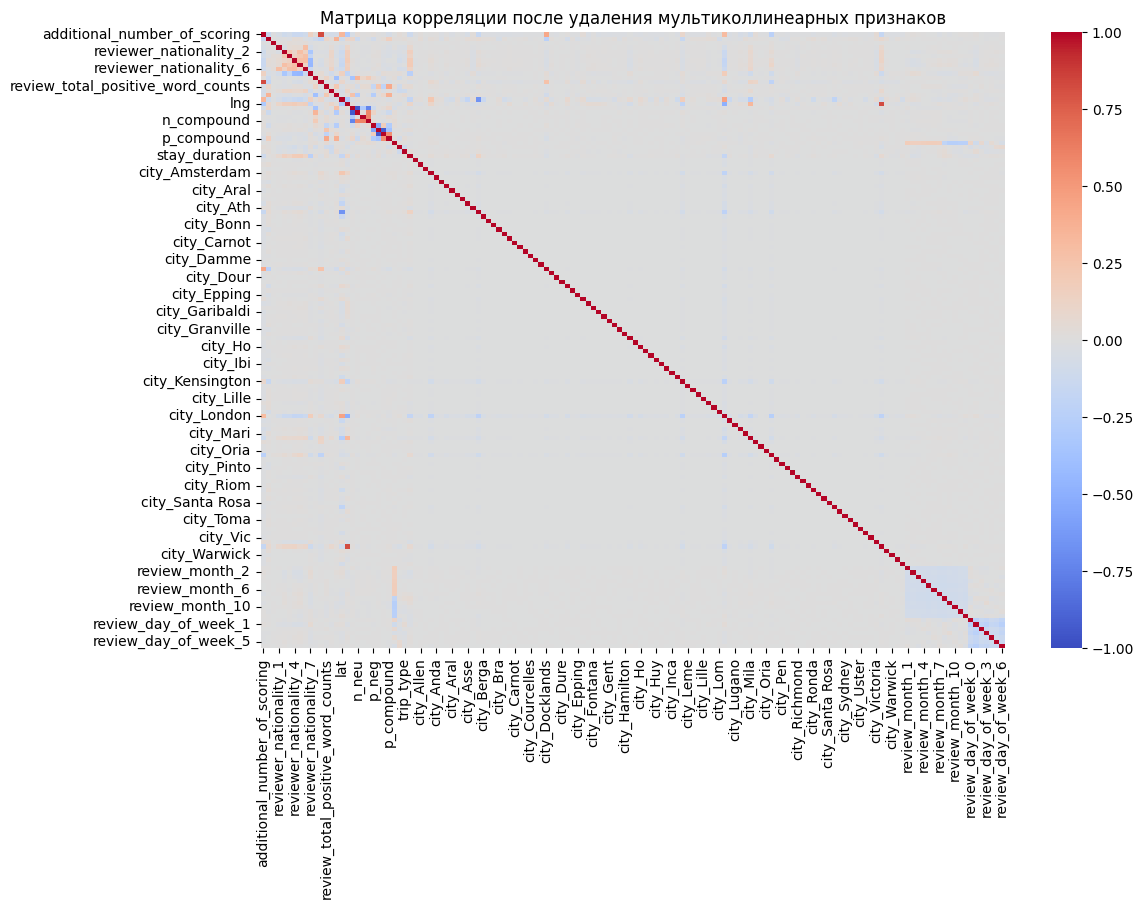

In [113]:
df_numeric = df.select_dtypes(include=[np.number])


corr_matrix = df_numeric.corr()

high_corr_features = set()
threshold = 0.95

for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if (col != row) & (abs(corr_matrix.loc[row, col]) > threshold):
            high_corr_features.add(col)

df.drop(columns=high_corr_features, inplace=True)


plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Матрица корреляции после удаления мультиколлинеарных признаков")
plt.show()

In [114]:
print(f'удалены признаки: {high_corr_features}')

удалены признаки: set()


In [115]:
from sklearn.feature_selection import f_classif, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

num_features = df.select_dtypes(include=[np.number]).columns
X_num = df[num_features].drop(columns=['reviewer_score'])
y = df['reviewer_score']

scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

anova_selector = SelectKBest(f_classif, k=15)
X_num_selected = anova_selector.fit_transform(X_num_scaled, y)
selected_num_features = np.array(num_features.drop('reviewer_score'))[anova_selector.get_support()]

df['reviewer_score_binned'] = pd.cut(df['reviewer_score'], bins=5, labels=False)

cat_features = df.select_dtypes(include=['object']).columns
df_reduced = df.copy()

In [116]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

cat_features = df.select_dtypes(include=['object']).columns

df_reduced = df.copy()
for col in cat_features:
    top_values = df[col].value_counts().index[:10]
    df_reduced[col] = df[col].where(df[col].isin(top_values), 'Other')

X_cat = pd.get_dummies(df_reduced[cat_features], drop_first=False, dtype=np.int8)

print(" Фичи после OHE:", X_cat.columns.tolist())

chi2_selector = SelectKBest(chi2, k=10)
X_cat_selected = chi2_selector.fit_transform(X_cat, df['reviewer_score_binned'])
selected_cat_features = np.array(X_cat.columns)[chi2_selector.get_support()]

print(" Выбранные категориальные фичи:", selected_cat_features)

final_features = list(selected_num_features) + list(selected_cat_features)
missing_features = [feat for feat in final_features if feat not in df.columns]

if missing_features:
    print(" Эти фичи отсутствуют в df и вызовут ошибку:", missing_features)

final_features = [feat for feat in final_features if feat in df.columns]

df = df[final_features + ['reviewer_score']]

print(f" Финальные отобранные признаки: {final_features}")

 Фичи после OHE: ['hotel_address_1 Inverness Terrace Westminster Borough London W2 3JP United Kingdom', 'hotel_address_1 Waterview Drive Greenwich London SE10 0TW United Kingdom', 'hotel_address_163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom', 'hotel_address_225 Edgware Road Westminster Borough London W2 1JU United Kingdom', 'hotel_address_372 Strand Westminster Borough London WC2R 0JJ United Kingdom', 'hotel_address_4 18 Harrington Gardens Kensington and Chelsea London SW7 4LH United Kingdom', 'hotel_address_7 Pepys Street City of London London EC3N 4AF United Kingdom', 'hotel_address_Other', 'hotel_address_Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom', 'hotel_address_Westminster Bridge Road Lambeth London SE1 7UT United Kingdom', 'hotel_address_Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom', 'hotel_name_Britannia International Hotel Canary Wharf', 'hotel_name_Copthorne Tara Hotel London Kensington', 'hotel_nam

In [117]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

num_features = [col for col in df.columns if col not in ['reviewer_score', 'reviewer_score_binned']]

minmax_scaler = MinMaxScaler()
df[num_features] = minmax_scaler.fit_transform(df[num_features])

standard_scaler = StandardScaler()
df[num_features] = standard_scaler.fit_transform(df[num_features])

print(df.head(10))

   additional_number_of_scoring  average_score  reviewer_nationality_6  \
0                      0.165422       0.005054               -0.475317   
1                     -0.398288      -0.177467               -0.475317   
2                     -0.932013       0.917663                2.103859   
3                     -0.928015      -1.637641               -0.475317   
4                      0.831079       0.187576                2.103859   
5                     -0.786088      -0.725033               -0.475317   
6                      0.711141      -1.090076               -0.475317   
7                     -0.542214      -0.177467               -0.475317   
8                     -0.542214       0.370098               -0.475317   
9                      0.689152      -1.090076               -0.475317   

   review_total_negative_word_counts  total_number_of_reviews  \
0                          -0.523140                -0.323767   
1                          -0.523140                -0.

--------------------

In [118]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [119]:
num_features = [col for col in df.columns if col not in ['reviewer_score', 'reviewer_score_binned']]
minmax_scaler = MinMaxScaler()
df[num_features] = minmax_scaler.fit_transform(df[num_features])
standard_scaler = StandardScaler()
df[num_features] = standard_scaler.fit_transform(df[num_features])


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

df= df.drop(columns=['reviewer_score'])
X = df.drop(columns=['reviewer_score_binned'])
y = df_reduced['reviewer_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAPE: {mape * 100:.2f}%')

MAPE: 12.61%
